In [1]:
import numpy as np
import random
import matplotlib.pyplot as plt
import multiprocessing
import time
import pickle

In [2]:
N=10**6
num_mc_iters = 10**3
probabilities = [10**-4, 5*10**-4, 10**-3, 5*10**-3, 10**-2, 5*10**-2, 10**-1]

In [3]:
def find_multiples(num):
    multiples = []
    for i in range(1, num+1):
        if num%i == 0:
            multiples.append(i)
            
    return multiples

def run_mc(args):
    N, num_mc_iters, p, p_batch_and_num_tests = args
    batch_and_num_tests = dict()

    for k in find_multiples(N):
        num_tests = 0
        for _ in range(num_mc_iters):
            infected_set = set(random.sample(range(1, N+1), int(p*N)))

            def check_infected(batch):
                return len(batch) if len(set(batch).intersection(infected_set)) > 0 else 0


            batches = np.arange(1, N+1).reshape(N//k, k)
            result = sum(np.array(list(map(check_infected, batches))))
            num_tests += result
            num_tests += batches.shape[0]


        batch_and_num_tests[k] = num_tests/num_mc_iters
        
    p_batch_and_num_tests[p] = batch_and_num_tests
    
    return p_batch_and_num_tests

In [4]:
start_time = time.perf_counter()
processes = []

manager = multiprocessing.Manager()
p_batch_and_num_tests = manager.dict()

for i in range(len(probabilities)):
    args = [N, num_mc_iters, probabilities[i], p_batch_and_num_tests]
    p = multiprocessing.Process(target = run_mc, args=(args,))
    p.start()
    processes.append(p)

# Joins all the processes 
for p in processes:
    p.join()

finish_time = time.perf_counter()

print(f"Program finished in {finish_time-start_time} seconds")

Program finished in 18418.134312213 seconds


In [5]:
p_batch_and_num_tests.items()

[(0.0005,
  {1: 1000500.0,
   2: 500999.774,
   4: 251998.564,
   5: 202497.385,
   8: 128992.776,
   10: 104988.97,
   16: 70470.432,
   20: 59952.56,
   25: 52425.025,
   32: 47124.72,
   40: 44806.44,
   50: 44702.3,
   64: 47131.496,
   80: 51731.44,
   100: 58773.2,
   125: 68619.125,
   160: 83170.32,
   200: 100199.4,
   250: 121495.5,
   320: 151098.12,
   400: 183780.0,
   500: 223209.0,
   625: 269773.75,
   800: 330972.4,
   1000: 394220.0,
   1250: 465926.25,
   1600: 552186.6,
   2000: 633356.0,
   2500: 714802.5,
   3125: 790979.375,
   4000: 864978.0,
   5000: 919440.0,
   6250: 957547.5,
   8000: 982501.0,
   10000: 993490.0,
   12500: 998067.5,
   15625: 999673.375,
   20000: 1000030.0,
   25000: 1000040.0,
   31250: 1000032.0,
   40000: 1000025.0,
   50000: 1000020.0,
   62500: 1000016.0,
   100000: 1000010.0,
   125000: 1000008.0,
   200000: 1000005.0,
   250000: 1000004.0,
   500000: 1000002.0,
   1000000: 1000001.0}),
 (0.0001,
  {1: 1000100.0,
   2: 500199.99,
   

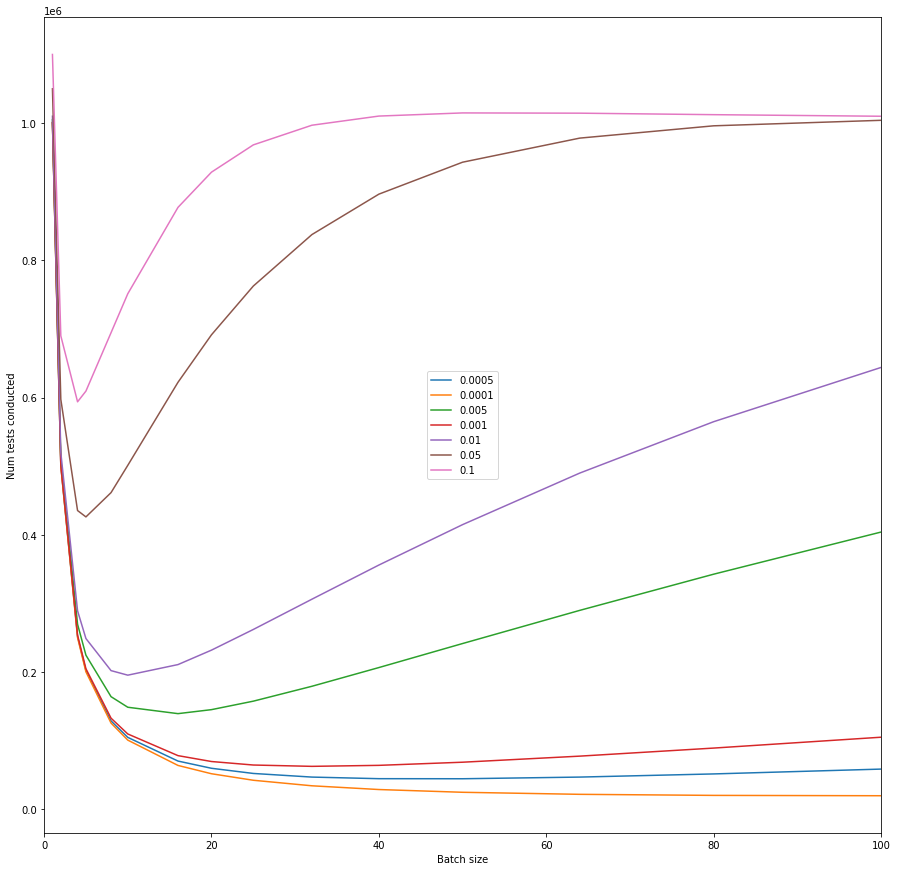

In [8]:
plt.figure(figsize=(15, 15))

for p, p_data in p_batch_and_num_tests.items():
    plt.plot(p_data.keys(), p_data.values(), label=p)
    
plt.xlim(0, 100)
plt.xlabel("Batch size")
plt.ylabel("Num tests conducted")
plt.legend()

plt.savefig("./images/batch_size_vs_num_tests.jpg", bbox_inches="tight")

In [17]:
# with open("problem1_data.pkl", "wb") as f:
#     pickle.dump(dict(p_batch_and_num_tests), f)